# 1. Introducción a Jupyter Python

## Regresión lineal simple
### Modelo Estadistico
El modelo estadístico en regresión lineal simple se puede escribir de la siguiente manera como se muestra a continuación.

La variable respuesta $Y$ se expresa como una suma de $\beta_0 + \beta_1 X_i$ y un error aleatorio $\epsilon_i$ el cual tiene distribución $N(0, \sigma^2)$. El modelo en esta forma se puede expresar como sigue.

\begin{align} \label{mod1}
Y_i &= \beta_0 + \beta_1X_i + \epsilon_i,\\ 
\epsilon_i &\sim N(0, \sigma^2)
\end{align}


### Usando R y la Función `lm` para hallar el modelo de regresión
La función `lm` (linear model) de R se usa para ajustar un modelo de regresión lineal simple, la estructura de esta función se muestra a continuación.

### Ejemplo 
Como ilustración vamos a usar los datos del ejemplo 2.1 del libro Montgomery(2006) En el ejemplo 2.1 los autores desean ajustar un modelo de regresión lineal simple para explicar la Resistencia de una soldadura en función de la Edad de la soldadura.


<img src="https://github.com/fhernanb/libro_regresion/blob/master/images/ilustracion_soldadura.png?raw=true" alt="soldar" width="500"/>


__Solución__

A continuación el código para cargar los datos y para mostrar las 6 primeras observaciones de la base de datos, en total tenemos 20 observaciones.

```r

file <- "https://raw.githubusercontent.com/fhernanb/datos/master/propelente"
datos <- read.table(file=file, header=TRUE)
head(datos) # shows the first 6 rows
```
```
##   Resistencia  Edad
## 1     2158.70 15.50
## 2     1678.15 23.75
## 3     2316.00  8.00
## 4     2061.30 17.00
## 5     2207.50  5.50
## 6     1708.30 19.00

```


Para crear un diagrama de dispersión que nos muestre la relación entre las dos variables usamos las siguientes instrucciones.

```r 
library(ggplot2)
ggplot(datos, aes(x=Edad, y=Resistencia)) + 
  geom_point() + theme_light()
```

<img src="https://fhernanb.github.io/libro_regresion/Regresion_con_R_files/figure-html/soldadura1-1.png" alt="plot" width="500"/>


El modelo que se va a ajustar se muestra a continuación.

\begin{align}
Resistencia_i &\sim N(\mu_i, \sigma^2), \\ 
\mu_i &= \beta_0 + \beta_1 Edad_i, \\
\end{align}

Para obtener las estimaciones de los parámetros del modelo anterior se usa el código mostrado abajo. La función `lm` se aplica con la fórmula `Resistencia ~ Edad` para indicar que Resistencia es la variable respuesta y que Edad es la variable explicativa. Los resultados del la función `lm` se almacenan en el objeto `mod1` para luego poder usar el modelo ajustado. La segunda línea del código mostrado abajo se usa para mostrar por pantalla un reporte sencillo del modelo ajustado.

```r
mod1 <- lm(Resistencia ~ Edad, data=datos)
mod1 # Para imprimir el objeto mod1
```
```
## 
## Call:
## lm(formula = Resistencia ~ Edad, data = datos)
## 
## Coefficients:
## (Intercept)         Edad  
##     2627.82       -37.15
```

Con los resultados anteriores se puede expresar el modelo ajustado como se muestra a continuación.

\begin{align}
\widehat{Resistencia}_i &\sim N(\hat{\mu}_i, \hat{\sigma}^2), \\ 
\hat{\mu}_i &= 2627.822 -37.154 \, Edad_i, \\
\end{align}


¿Cómo se pueden interpretar los efectos $\hat{\beta}$?

---
- Por cada semana que envejezca la soldadura, se espera que la __resistencia promedio__ disminuya en 37.154 psi.
- Si la soldadura es nueva ($Edad =0$), se espera que la __resistencia promedio__ sea de 2627.822 psi.
---

Para incluir la recta de regresión que representa el modelo ajustado anterior se puede usar el siguiente código.

```r 
ggplot(datos, aes(x=Edad, y=Resistencia)) + 
  geom_point() +
  geom_smooth(method='lm', formula=y~x, se=FALSE, col='dodgerblue1') +
  theme_light()
```

<img src="https://fhernanb.github.io/libro_regresion/Regresion_con_R_files/figure-html/soldadura2-1.png" alt="lm" width="500"/>


## Ficheros

In [103]:
import pandas as pd 

df=pd.read_csv('USA_cars_datasets.csv')
df= pd.DataFrame(df)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [118]:
data=df.drop(df[df['price']==0].index)
#Precio-describe
data.head(6)
#data['price'].describe()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5,5700,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


<AxesSubplot:ylabel='Frequency'>

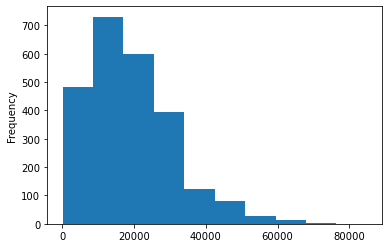

In [117]:

data.price.plot.hist()




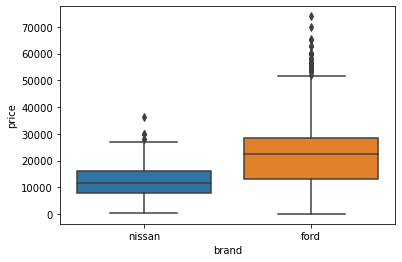

In [115]:
#Comparando marcas y precios 
import seaborn as sns
nissan=data[data['brand']=='nissan']

ford=data[data['brand']=='ford']
data2=[nissan,ford]
result = pd.concat(data2, sort='False', ignore_index='True')
result




ax = sns.boxplot(x="brand", y="price", data=result)



# 3. Introduccion a Web Scraping

### Stock de una tienda de productos electrónicos
    

In [121]:
import json
db_stock = '''
[ 
{ "id" : "001",
"stock" : 10,
"name" : "Laptop HP",
 "descripcion" : "Core i5 novena generación, 8gb de ram, color plateado...",
 "precio" : "1999"
 
} ,

{ "id" : "002",
"stock" : 20,
"name" : "Camara Canon",
 "descripcion" : "18mpx, modelo T100, velocidad de obturador...",
 "precio" : "1499"
 
},

{ "id" : "003",
"stock" : 15,
"name" : "Tablet Lenovo",
 "descripcion" : "8 pulgadas, 3gb de Ram, color negro",
 "precio" : "599"
 
},

{ "id" : "004",
"stock" : 10,
"name" : "Iphone 11 pro max",
 "descripcion" : " iPhone 11 Pro Max es la variante del iPhone 11 con pantalla Super Retina XDR de 6.5 pulgadas.",
 "precio" : "4849"
 
},

{ "id" : "005",
"stock" : 30,
"name" : "Samsung Smart TV 32",
 "descripcion" : "Smart TV UN43TU8000GXPE de Samsung. Crystal Display. Crystal Processor 4K. Dual LED. Diseño ilimitado de 3 lados. Ambient Mode",
 "precio" : "1499"
 
}


]
'''

stock = json.loads(db_stock)
print('cantidad de productos:', len(stock),"\n")

for producto in stock :
    print('Nombre del producto:', producto['name'])
    print('Descripción del producto:', producto['descripcion'])
    print('Precio : S/', producto['precio'],"\n")    

print('Stock de las laptop HP \nStock:',stock[0]['stock'],'unidades')

#u_vendidas=2
stock[0]['stock']=stock[0]['stock']-2
print('Nuevo nuevo stock de las laptop HP \nStock:',stock[0]['stock'],'unidades')


cantidad de productos: 5 

Nombre del producto: Laptop HP
Descripción del producto: Core i5 novena generación, 8gb de ram, color plateado...
Precio : S/ 1999 

Nombre del producto: Camara Canon
Descripción del producto: 18mpx, modelo T100, velocidad de obturador...
Precio : S/ 1499 

Nombre del producto: Tablet Lenovo
Descripción del producto: 8 pulgadas, 3gb de Ram, color negro
Precio : S/ 599 

Nombre del producto: Iphone 11 pro max
Descripción del producto:  iPhone 11 Pro Max es la variante del iPhone 11 con pantalla Super Retina XDR de 6.5 pulgadas.
Precio : S/ 4849 

Nombre del producto: Samsung Smart TV 32
Descripción del producto: Smart TV UN43TU8000GXPE de Samsung. Crystal Display. Crystal Processor 4K. Dual LED. Diseño ilimitado de 3 lados. Ambient Mode
Precio : S/ 1499 

Stock de las laptop HP 
Stock: 10 unidades
Nuevo nuevo stock de las laptop HP 
Stock: 8 unidades


# 4. APIs
## Uso de una API de base de datos de películas

In [127]:
import requests
import json
languages='es-ES'
pages='1'
query='mañana te cuento'
api_key='105eb79aa1e6df60a2b95878ad2289aa'

response=requests.get(f"https://api.themoviedb.org/3/search/movie?api_key={api_key}&language={languages}&page={pages}&include_adult=false&query={query}")
print(response.json())




{'page': 1, 'results': [{'adult': False, 'backdrop_path': None, 'genre_ids': [35, 18, 10749], 'id': 67084, 'original_language': 'es', 'original_title': 'Mañana te cuento', 'overview': 'Las correrías sexuales de un grupo de chicos de la clase alta limeña son la materia prima del debut en el largometraje de Eduardo Mendoza de Echave. La comedia de situaciones y aprendizaje es aplicada aquí por el director con la suficiente solvencia como para divertir sin presiones de otro.', 'popularity': 1.459, 'poster_path': '/j4a6UST2XExMQ8ZRSIWJaVny1ip.jpg', 'release_date': '2005-04-28', 'title': 'Mañana te cuento', 'video': False, 'vote_average': 5.2, 'vote_count': 6}, {'adult': False, 'backdrop_path': None, 'genre_ids': [35, 18], 'id': 67085, 'original_language': 'es', 'original_title': 'Mañana te cuento 2', 'overview': 'Han pasado cuatro años desde la noche que les cambió la vida a estos cuatro amigos que aún no habían terminado el colegio. La amistad de tres de ellos sobrevivió a esa intensa noc

In [128]:
busqueda=response.json()
print("Total de resultados:",busqueda["total_results"],"\n")

i=1
for pelicula in busqueda["results"]:
    
        print(f"{i}.-",pelicula["original_title"],"\n")
        print("Fecha de lanzamiento:",pelicula["release_date"])
        print("Valoración:",pelicula["vote_average"])
        print("Sinopsis:\n",pelicula["overview"],)
        
        print("\n")
        i+=1
    

Total de resultados: 2 

1.- Mañana te cuento 

Fecha de lanzamiento: 2005-04-28
Valoración: 5.2
Sinopsis:
 Las correrías sexuales de un grupo de chicos de la clase alta limeña son la materia prima del debut en el largometraje de Eduardo Mendoza de Echave. La comedia de situaciones y aprendizaje es aplicada aquí por el director con la suficiente solvencia como para divertir sin presiones de otro.


2.- Mañana te cuento 2 

Fecha de lanzamiento: 2008-02-14
Valoración: 4
Sinopsis:
 Han pasado cuatro años desde la noche que les cambió la vida a estos cuatro amigos que aún no habían terminado el colegio. La amistad de tres de ellos sobrevivió a esa intensa noche, ahora viven juntos e intentan hacer menos duro y más pasajero ese inevitable tránsito hacia la adultez. Sin embargo, un personaje del pasado vendrá a complicar las cosas de manera tan inesperada como vertiginosa, obligándolos a tomar decisiones para las que quizás no se sientan preparados. Efraín y el gordo pasarán de una alocada 